In [1]:
import keras
import tensorflow as tf
import numpy as np
import os
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb
import cv2
os.system("rm /content/archive-4/train/.DS_Store")
os.system("rm /content/archive-4/test/.DS_Store")
os.system("rm /content/archive-4/valid/.DS_Store")

256

I will now import and standardize the data.

In [2]:
global labels
labels=os.listdir("/content/archive-4/train")

def getdataset(datapath):
    global labels
    imlen = 224
    data = []
    for label in labels:
        npath=os.path.join(datapath,label)
        nnum=labels.index(label)
        for image in os.listdir(npath):
            imageArray = cv2.imread(os.path.join(npath,image))[::-1]
            resized_arr = cv2.resize(imageArray, (imlen, imlen))
            if (len(resized_arr) == 224 and len(resized_arr[0]) == 224) and len(resized_arr[0][0]):
                data.append([resized_arr,nnum])
            else:
                raise ValueError
    return data

train = getdataset("/content/archive-4/train")
validation = getdataset("/content/archive-4/valid")
test = getdataset("/content/archive-4/test")

Below is a graph counting the occurrences of each species given their number of appearance in the data. 

<Axes: ylabel='Count'>

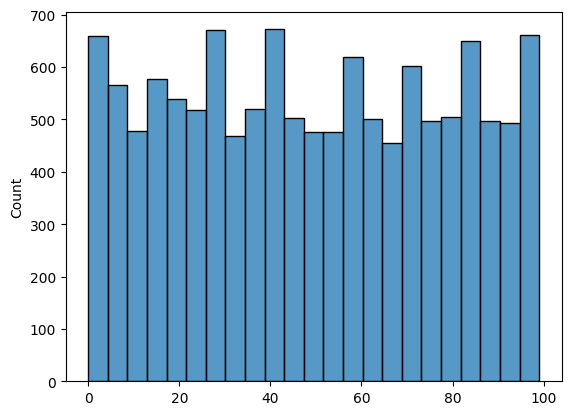

In [3]:
l=list([x[1] for x in train])
sb.histplot(l)

As shown by the graph above, this dataset contains around 120 images for each of the 100 species of butterfly or moth in the dataset within the training data.
Given the data, this model should be able to identify the species of a butterfly or a moth given its picture in the given format, as long as it is within the 100 species that are in the training dataset.

In [4]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test=[]
y_test=[]

for f1 in train:
    feature=f1[0]
    label=f1[1]
    x_train.append(feature)
    y_train.append(label)

for f2 in validation:
    feature=f2[0]
    label=f2[1]
    x_val.append(feature)
    y_val.append(label)
    
for f3 in test:
    feature=f3[0]
    label=f3[1]
    x_test.append(feature)
    y_test.append(label)

x_train=np.array(x_train)
y_train=keras.utils.to_categorical(np.array(y_train))
x_val=np.array(x_val)
y_val=keras.utils.to_categorical(np.array(y_val))
x_test=np.array(x_test)
y_test=keras.utils.to_categorical(np.array(y_test))


Below we begin working with two model architectures to identify the moths or butterflies.

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(len(labels), activation="softmax"))
model.summary()
#print(x_val.shape,y_val.shape)
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt , 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [6]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model2.add(tf.keras.layers.MaxPool2D())
model2.add(tf.keras.layers.Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model2.add(tf.keras.layers.MaxPool2D())

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(128,activation="relu"))
model2.add(tf.keras.layers.Dense(128,activation="relu"))

model2.add(tf.keras.layers.Dense(len(labels), activation="softmax"))
model2.summary()
#print(x_val.shape,y_val.shape)
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer = opt , 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
history = model2.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)           

In [7]:
predict_x=model.predict(x_val) 
predictions=np.argmax(predict_x,axis=1)
lll=y_val.tolist()
llll=[]
for x in range(len(predictions)):
  vv=lll[x].index(1)
  llll.append(vv)
print(classification_report(llll, predictions,target_names=labels))

16/16 [==============================] - 0s 10ms/step
                           precision    recall  f1-score   support

               ORANGE TIP       0.60      0.60      0.60         5
             LARGE MARBLE       0.00      0.00      0.00         5
        COMMON WOOD-NYMPH       0.20      0.20      0.20         5
          CHALK HILL BLUE       1.00      0.60      0.75         5
               PAPER KITE       0.75      0.60      0.67         5
                    ATALA       0.80      0.80      0.80         5
         GREEN HAIRSTREAK       0.60      0.60      0.60         5
        BLUE SPOTTED CROW       0.00      0.00      0.00         5
       RED SPOTTED PURPLE       0.50      0.60      0.55         5
              GOLD BANDED       0.45      1.00      0.62         5
        GARDEN TIGER MOTH       0.43      0.60      0.50         5
              RED ADMIRAL       0.75      0.60      0.67         5
         MANGROVE SKIPPER       0.67      0.80      0.73         5
       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
predict_x2=model2.predict(x_val) 
predictions2=np.argmax(predict_x2,axis=1)
lll2=y_val.tolist()
llll2=[]
for x in range(len(predictions2)):
  vv2=lll2[x].index(1)
  llll2.append(vv2)
print(classification_report(llll2, predictions2,target_names=labels))

16/16 [==============================] - 0s 10ms/step
                           precision    recall  f1-score   support

               ORANGE TIP       0.25      0.20      0.22         5
             LARGE MARBLE       0.00      0.00      0.00         5
        COMMON WOOD-NYMPH       0.20      0.20      0.20         5
          CHALK HILL BLUE       0.20      0.20      0.20         5
               PAPER KITE       0.17      0.20      0.18         5
                    ATALA       1.00      0.40      0.57         5
         GREEN HAIRSTREAK       0.00      0.00      0.00         5
        BLUE SPOTTED CROW       0.00      0.00      0.00         5
       RED SPOTTED PURPLE       0.00      0.00      0.00         5
              GOLD BANDED       0.40      0.40      0.40         5
        GARDEN TIGER MOTH       1.00      0.20      0.33         5
              RED ADMIRAL       0.50      0.60      0.55         5
         MANGROVE SKIPPER       0.57      0.80      0.67         5
       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As the model reports above show, adding the dropout layer seems to have decreased the accuracy and not eliminated the overfitting problem. The most accurate outcome, at roughly 55%, was my first model, but the first and second models both suffered from overfitting. Below is my transfer learning model. This model performed much better than either of mine, but is considerably more robust and longer to train.

In [9]:
model3= keras.models.load_model('/content/archive-4/TransferModel.h5', custom_objects={'F1_score':'F1_score'})
opt3 = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer = opt3 , 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
history = model3.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Epoch 1/10
394/394 [==============================] - 83s 176ms/step - loss: 2.1032 - accuracy: 0.7054 - val_loss: 1.4522 - val_accuracy: 0.8940
Epoch 2/10
394/394 [==============================] - 63s 161ms/step - loss: 1.3849 - accuracy: 0.8753 - val_loss: 1.3350 - val_accuracy: 0.9020
Epoch 3/10
394/394 [==============================] - 64s 162ms/step - loss: 1.1407 - accuracy: 0.9127 - val_loss: 1.0475 - val_accuracy: 0.9280
Epoch 4/10
394/394 [==============================] - 64s 163ms/step - loss: 1.0454 - accuracy: 0.9250 - val_loss: 1.0181 - val_accuracy: 0.9420
Epoch 5/10
394/394 [==============================] - 64s 163ms/step - loss: 1.1246 - accuracy: 0.9165 - val_loss: 1.0667 - val_accuracy: 0.9420
Epoch 6/10
394/394 [==============================] - 63s 161ms/step - loss: 0.9866 - accuracy: 0.9338 - val_loss: 1.1080 - val_accuracy: 0.9140
Epoch 7/10
394/394 [==============================] - 63s 161ms/step - loss: 0.9599 - accuracy: 0.9391 - val_loss: 1.1635 - val_ac

In [10]:
predict_x3=model3.predict(x_val) 
predictions3=np.argmax(predict_x3,axis=1)
lll3=y_val.tolist()
llll3=[]
for x in range(len(predictions3)):
  vv3=lll3[x].index(1)
  llll3.append(vv3)
print(classification_report(llll3, predictions3,target_names=labels))

16/16 [==============================] - 2s 45ms/step
                           precision    recall  f1-score   support

               ORANGE TIP       1.00      0.80      0.89         5
             LARGE MARBLE       1.00      0.80      0.89         5
        COMMON WOOD-NYMPH       1.00      1.00      1.00         5
          CHALK HILL BLUE       0.75      0.60      0.67         5
               PAPER KITE       1.00      0.80      0.89         5
                    ATALA       1.00      1.00      1.00         5
         GREEN HAIRSTREAK       1.00      1.00      1.00         5
        BLUE SPOTTED CROW       1.00      0.80      0.89         5
       RED SPOTTED PURPLE       1.00      1.00      1.00         5
              GOLD BANDED       1.00      1.00      1.00         5
        GARDEN TIGER MOTH       0.71      1.00      0.83         5
              RED ADMIRAL       0.83      1.00      0.91         5
         MANGROVE SKIPPER       1.00      1.00      1.00         5
       

This model had a greater accuracy than both my other models combined at 94%. However, it takes about five times as long to train. Often, this is the tradeoff, and this knowledge can greatly affect which models I choose to train and what I choose to use for the application at hand.

Overall, I found this project to be very rewarding to complete. Regardless of the fact that my models were greatly outperformed by the prepared model that came with the dataset, I still obtained an accuracy that I am quite happy with, and I look forward to using this knowledge in the future.